In [1]:
from mpl_toolkits import mplot3d
%matplotlib notebook

import numpy as np
from scipy.interpolate import  griddata
import matplotlib.pyplot as plt

Our data is in the form of [[x0, y0, z0], [x1, y1, z1], [x2, y2, z2], ... [xn, yn, zn]]  
but it is over a regular rectangular grid.  
The `load_data` function tries to mimic that over a 30 X 30 grid.  
The `reshape_data` function then creates a mesh grid for X, Y, and Z:  
X = [ [x0, x1, ... x29],  
   ...,  
   [x870, x871, ... x899] ]

In [2]:
DOMAIN = 0, 5, 0, 5
XMIN, XMAX, YMIN, YMAX = DOMAIN


def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)


def load_data():
    x_values = np.linspace(XMIN, XMAX, 30)
    y_values = np.linspace(XMIN, XMAX, 30)
    X, Y = np.meshgrid(x_values, y_values)
    Z = f(X, Y)
    return list(zip(X.flatten(), Y.flatten(), Z.flatten()))


def reshape_data(DATA):
    x, y, z = np.array(list(map(list, zip(*DATA))))
    x = np.unique(x)
    y = np.unique(y)
    
    X,Y = np.meshgrid(x,y)
    Z = z.reshape(len(y),len(x))
    return X, Y, Z
    

X, Y, Z = reshape_data(load_data())

<IPython.core.display.Javascript object>


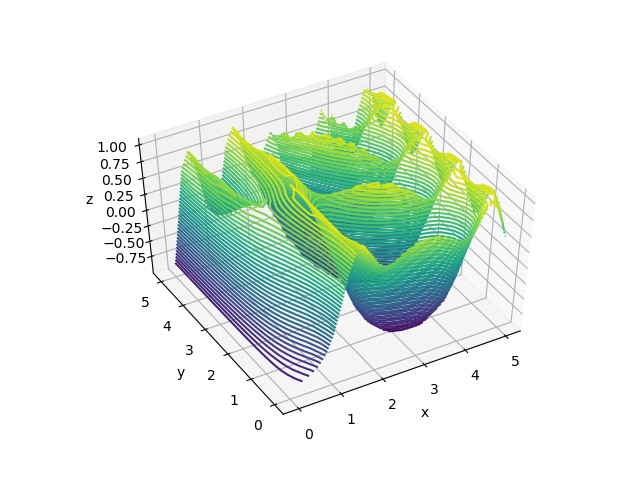

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(50, -120);

<IPython.core.display.Javascript object>


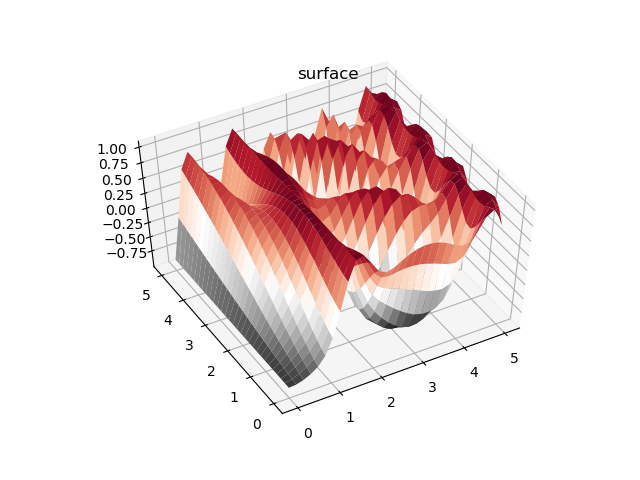

In [4]:
fig2 =plt.figure()
ax2 = plt.axes(projection='3d')
ax2.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='RdGy_r', edgecolor='none')
ax2.set_title('surface')
ax2.view_init(50, -120);

Let's make a publishable figure:  
(stolen from [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html))

<IPython.core.display.Javascript object>


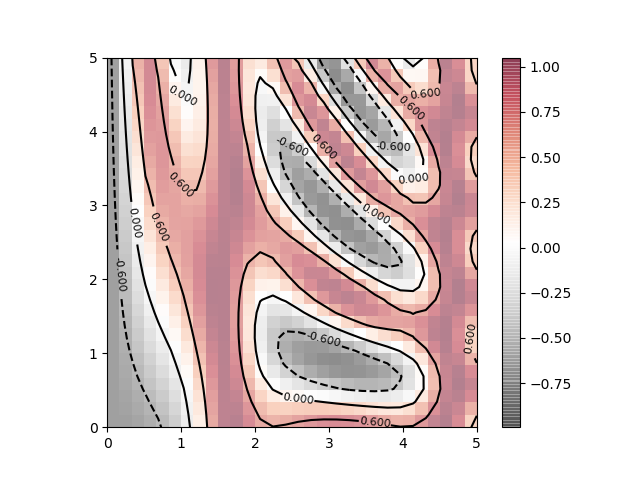

In [5]:
fig3 =plt.figure()
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=DOMAIN, origin='lower', cmap='RdGy_r', alpha=0.5)
plt.colorbar()
plt.axis(aspect='image');

I know, it's 2D, but we can make it even better looking with 2D cubic interpolation :)  
The nice thing is that this interpolation technique can be used on irregular sets of data points, as well.

<IPython.core.display.Javascript object>


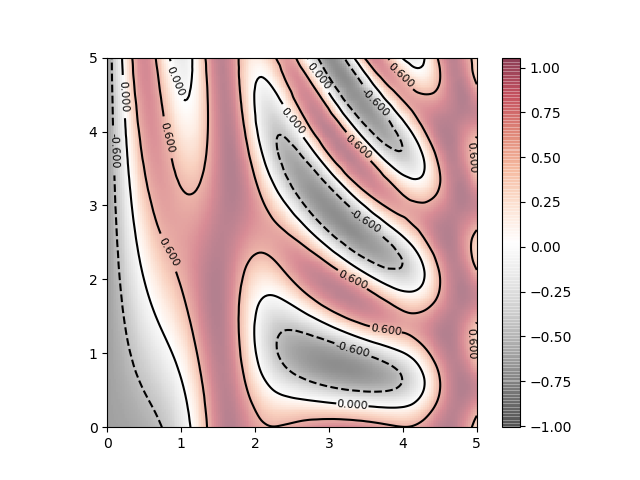

In [6]:
X_new, Y_new = np.mgrid[XMIN:XMAX:200j, YMIN:YMAX:200j]
Z_new = griddata((X.flatten(), Y.flatten()), Z.flatten(), (X_new, Y_new), method='cubic')
# interpolation methods: nearest, linear, cubic

fig4 =plt.figure()
contours = plt.contour(X_new, Y_new, Z_new, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z_new.T, extent=DOMAIN, origin='lower', cmap='RdGy_r', alpha=0.5)
plt.colorbar()
plt.axis(aspect='image');